**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Proyecto integrador**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 3**
Avance 1. Análisis exploratorio de datos
---

*  Salvador Martínez Morales A01273366
*  Fernando Acevedo Ortegate A01794022
*  José Francisco Miranda García A00837306


### Importamos librerías necesarias

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install mysql-connector-python==8.0.32

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 75.7 MB/s eta 0:00:00


In [4]:
# Obtiene IP del NoteBook

# !curl ipecho.net/plain

34.21.7.11

### Conexión a base de datos y extracción de información

Para efectos de este primer ejercicio en cuanto a la comprensión de datos, vamos a extraer solo 1000 registros, de los cuales se van a seleccionar columnas que mejhor describen la operación de cada una de las sucursales que analizaremos.

In [56]:
# Configura conexión con base de datos de MYSql alojada en GCP

db_connection = mysql.connector.connect(
  host="",
  user="",
  password="",
  database=""
)

cursor = db_connection.cursor()

In [57]:
# Valida estatus de conexión

cursor.execute("SELECT VERSION()")
testConnection = cursor.fetchone()
print(f"Database version: {testConnection[0]}")

Database version: 8.0.31-google


Para la consulta utilizaremos parte de los datos que queremos analizar, en este caso nos interesan las columnas:
* vch_identifier, corresponde al identificador de la sucursal
* txt_prediction, contiene objetos tipo JSON con diferentes valores correspondientes a tiempo de servicio, tiempo de espera, así como número de cajas abiertas por hora.
* int_checkouts, numero de checkouts propuestos
* FLT_TimeAttentionReal, tiempo real de atención

De nuestra tabla de datos principal TBL_Snapshots

In [80]:
# Query de consulta limitada a 1000 registros, se puede extraer más información, el tamaño actual de la tabla es de 300,000 registros

query = "SELECT vch_identifier, txt_prediction, int_checkouts, FLT_TimeAttentionReal FROM TBL_Snapshots LIMIT 1000;"

In [59]:
# Cargamos los datos en un DataFrame para realizar el análisis a continuación

data = pd.read_sql(query, con=db_connection)
db_connection.close()

# Imprimimos los primeros 5 registros

data.head()

<ipython-input-59-549aa8d9aedc>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, con=db_connection)


,vch_identifier,txt_prediction,int_checkouts,FLT_TimeAttentionReal
0,ZA2,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",11,106.3470
1,CNA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",5,82.2148
2,ZPA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",6,78.0680
3,CNA,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",4,83.7523
4,ZRY,"{""tables"":{""checkouts"":["""","""","""","""","""","""",""1"",...",7,92.9797


### Procesamiento de columna txt_prediction de objetos tipo JSON

Nuestro data set contiene una serie de objetos tipo JSON, de los cuales tenemos que extraer la información y posteriormente analizar, a continuación agrego un ejemplo de cómo se ve el objeto tipo JSON del cual nos interesa extraer el objeto Tables con los valores checkouts, services, waitings y arrives:

{
  "tables": {
    "checkouts": [
      "",
      "",
      "",
      "",
      "",
      "",
      "1",
      "5",
      "7",
      "8",
      "8",
      "8",
      "9",
      "9",
      "9",
      "10",
      "9",
      "9",
      "9",
      "8",
      "6",
      "1"
    ],
    "services": [
      "",
      "",
      "",
      "",
      "",
      "",
      "0.0",
      "1.7",
      "2.0",
      "2.0",
      "2.0",
      "1.9",
      "1.9",
      "2.0",
      "1.9",
      "2.1",
      "2.0",
      "1.8",
      "1.9",
      "2.1",
      "2.0",
      "3.3"
    ],
    "waitings": [
      "",
      "",
      "",
      "",
      "",
      "",
      "0.3",
      "6.6",
      "9.4",
      "7.8",
      "8.7",
      "8.7",
      "9",
      "9",
      "7.7",
      "7.4",
      "7.2",
      "9",
      "8.5",
      "9.4",
      "7.7",
      "1.8"
    ],
    "arrives": [
      "",
      "",
      "",
      "",
      "",
      "",
      "1",
      "49",
      "77",
      "83",
      "86",
      "86",
      "98",
      "98",
      "93",
      "102",
      "91",
      "98",
      "96",
      "88",
      "62",
      "5"
    ]
  },
  "graphs": {
    "checkouts": [
      [
        "1",
        "6",
        "7",
        "8",
        "8",
        "8",
        "10",
        "9",
        "9",
        "9",
        "10",
        "9",
        "9",
        "8",
        "7",
        "3"
      ],
      [
        "1",
        "5",
        "7",
        "8",
        "8",
        "8",
        "9",
        "9",
        "9",
        "10",
        "9",
        "9",
        "9",
        "8",
        "6",
        "1"
      ]
    ],
    "services": [
      [
        "0.0",
        "1.7",
        "2.0",
        "2.0",
        "2.0",
        "1.9",
        "1.9",
        "2.0",
        "1.9",
        "2.1",
        "2.0",
        "1.8",
        "1.9",
        "2.1",
        "2.0",
        "3.3"
      ]
    ],
    "waitings": [
      [
        "0.3",
        "6.6",
        "9.4",
        "7.8",
        "8.7",
        "8.7",
        "9",
        "9",
        "7.7",
        "7.4",
        "7.2",
        "9",
        "8.5",
        "9.4",
        "7.7",
        "1.8"
      ]
    ],
    "arrives": [
      [
        "1",
        "49",
        "77",
        "83",
        "86",
        "86",
        "98",
        "98",
        "93",
        "102",
        "91",
        "98",
        "96",
        "88",
        "62",
        "5"
      ]
    ],
    "costs": [
      [
        "2.40",
        "24079.51",
        "48794.00",
        "51257.66",
        "49936.88",
        "45209.72",
        "54947.95",
        "59885.56",
        "52444.49",
        "54312.74",
        "51119.75",
        "50535.40",
        "48241.63",
        "55121.12",
        "31156.93",
        "5911.08"
      ]
    ],
    "cozts": [
      [
        "2.40",
        "512.33",
        "588.77",
        "599.50",
        "533.37",
        "492.75",
        "520.83",
        "547.53",
        "513.53",
        "547.92",
        "495.71",
        "486.50",
        "452.97",
        "533.86",
        "477.50",
        "824.80"
      ]
    ],
    "labels": [
      "6",
      "7",
      "8",
      "9",
      "10",
      "11",
      "12",
      "13",
      "14",
      "15",
      "16",
      "17",
      "18",
      "19",
      "20",
      "21"
    ]
  }
}


Función de extracción y procesamiento de datos tipo JSON

In [64]:
import pandas as pd
import json

def extract_json_fields(json_str):
    try:
        # Paso 1, se extrae el json de la columna txt_prediction
        json_data = json.loads(json_str.replace('\'', '\"'))
        tables = json_data.get('tables', {})
    except json.JSONDecodeError:
        # Paso 2, en caso de que algún objeto esté mal formado o no tenga datos se le asigna un valor por defecto en la decodificación del JSON
        tables = {}

    # Paso 3, en este paso se decidió sumar todos los valores de cada hora por objeto, para obtener un valor global que utilizaremos en el análisis
    # en caso de que no se cuente con valor alguno (NAN) se le agrega un 0
    checkouts = sum(float(item) for item in tables.get('checkouts', []) if isinstance(item, (int, float, str)) and item != '')
    waitings = sum(float(item) for item in tables.get('waitings', []) if isinstance(item, (int, float, str)) and item != '')
    services = sum(float(item) for item in tables.get('services', []) if isinstance(item, (int, float, str)) and item != '')
    arrives = sum(float(item) for item in tables.get('arrives', []) if isinstance(item, (int, float, str)) and item != '')

    return pd.Series([checkouts, waitings, services, arrives], index=['checkouts', 'waitings', 'services', 'arrives'])

# Aplicamos nuestra función
data[['checkouts', 'waitings', 'services', 'arrives']] = data['txt_prediction'].apply(extract_json_fields)


In [65]:
# Crear un nuevo DataFrame con las columnas seleccionadas
new_dataset = data[['vch_identifier', 'checkouts', 'waitings', 'services', 'arrives', 'FLT_TimeAttentionReal']].copy()
new_dataset.rename(columns={'vch_identifier': 'sucursal', 'FLT_TimeAttentionReal': 'tiemporealatencion'}, inplace=True)

print(new_dataset.head())

  sucursal  checkouts  waitings  services  arrives  tiemporealatencion
0      ZA2      116.0     118.2      30.6   1213.0            106.3470
1      CNA       55.0      83.1      21.0    587.0             82.2148
2      ZPA       81.0     207.6      20.4    766.0             78.0680
3      CNA       49.0      91.8      21.0    587.0             83.7523
4      ZRY       81.0     112.0      23.8   1064.0             92.9797


### Proceso de análisis de información y estadisticas descriptivas

#### Análisis de estadísticas descriptivas

Estadísiticas descriptivas

En general dentro de esta sección podemos observar de manera general los valores generales de nuestros datos, tanto en sus estadisticas descriptivas como en su tipo de datos

In [66]:
print(data.describe())

       int_checkouts  FLT_TimeAttentionReal  checkouts_extracted    checkouts  \
count    1000.000000            1000.000000          1000.000000  1000.000000   
mean        6.386000              95.924671            72.047000    72.047000   
std         2.202238              20.517365            21.880392    21.880392   
min         2.000000              53.095600            27.000000    27.000000   
25%         5.000000              82.820850            56.000000    56.000000   
50%         6.000000              93.427800            68.000000    68.000000   
75%         8.000000             103.405500            83.250000    83.250000   
max        14.000000             191.024000           183.000000   183.000000   

         waitings     services      arrives  
count  997.000000  1000.000000  1000.000000  
mean   122.763190    24.617500   896.470000  
std     65.557889     6.018547   275.916888  
min     29.000000    10.500000    16.000000  
25%     94.400000    20.800000   697.500

Tipos de variables

In [81]:
data.dtypes

,0
vch_identifier,object
txt_prediction,object
int_checkouts,int64
FLT_TimeAttentionReal,float64
checkouts_extracted,int64
checkouts,float64
waitings,float64
services,float64
arrives,float64


#### Generación de histogramas

De los siguientes histogramas podemos visualizar lo siguiente:

**Checkouts**: Se puede visualizar una distribución bimodal, con un sesgo de datos a la izquierda en donde los valores más altos están entre los 55 y 70 minutos

**Waitings**: Para los tiempos de espera podemos visualizar que son menores, es decir que hay una tendencia marcada a que los tiempos de espera sean bajos en referencia a los datos mostrados en general.

**Services**: Para el caso de los tiempos de servicio estos tienden a ser bajos igual que los tiempos de atención.

**Arrives**: En este caso la distribución es más homogenea (normal) en donde podemos observar un ligero sesgo a la izquierda donde se puede visualizar algunas llegadas atipicas que podremos observar de mejor fomra en los boxplots

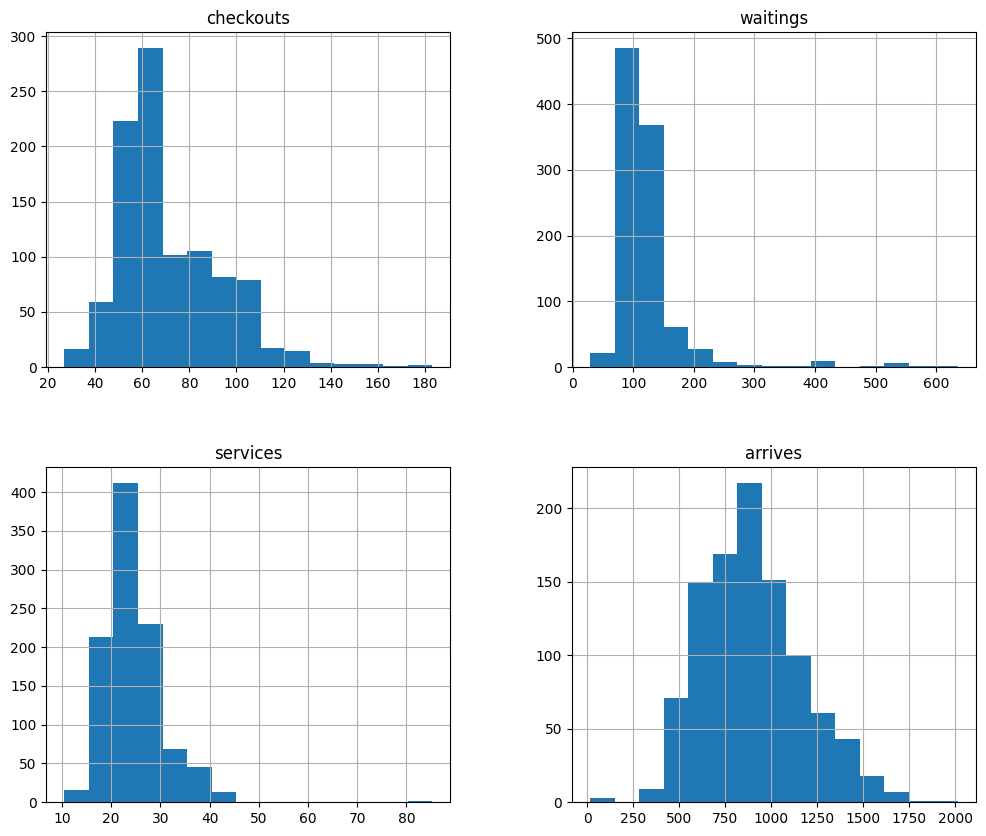

In [69]:
# Histogramas
data[['checkouts', 'waitings', 'services', 'arrives']].hist(bins=15, figsize=(12, 10))
plt.show()

#### Generación de cajas Boxplots

En los graficos de caja, podemos observar que para el caso de (waitings) espera los outliers son más marcados lo que quiere decir que a pesar de tener valores pequeños de espera de atención, existen ciertas eventualidades que ocasionan tiempos prolongados de espera en ciertas ocasiones

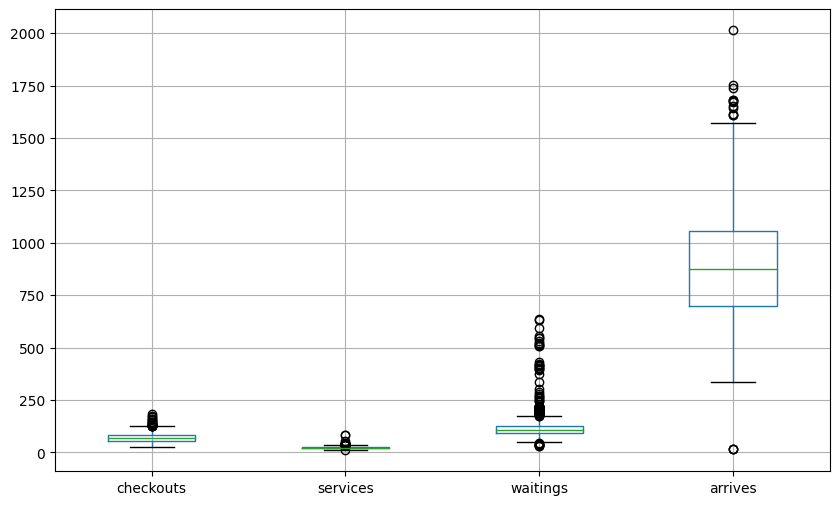

In [72]:
# Boxplots for each variable to show outliers
data.boxplot(column=['checkouts', 'services', 'waitings', 'arrives'], figsize=(10, 6))
plt.show()

#### Identificación de valores atípicos (Outliers)

In [73]:
outliers = data[['checkouts', 'services', 'waitings', 'arrives']].apply(lambda x: np.abs(x - x.mean()) > (3 * x.std()))
outliers.describe()

,checkouts,services,waitings,arrives
count,1000,1000,1000,1000
unique,2,2,2,2
top,False,False,False,False
freq,988,992,976,994


from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('checkouts').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('services').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('waitings').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('arrives').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['services'].value_counts()
    for x_label, grp in _df_23.groupby('checkouts')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('checkouts')
_ = plt.ylabel('services')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['waitings'].value_counts()
    for x_label, grp in _df_24.groupby('services')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('services')
_ = plt.ylabel('waitings')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['arrives'].value_counts()
    for x_label, grp in _df_25.groupby('waitings')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('waitings')
_ = plt.ylabel('arrives')

#### Conteo de valores (cardinalidad) para aquellos datos categoricos

Para este caso se contabilizó la frecuencia de registros por sucursal

In [82]:
# Conteo de registros por sucursal, contabilizado a los 1,000 registros de la consulta
data_suc = data['vch_identifier'].value_counts()
data_suc

,count
vch_identifier,
FAX,76
ZTY,69
ZAM,66
ZTH,64
ZOZ,59
ZCL,58
ZLN,41
ZCC,40
ZSJ,36


#### Análisis de destribución de los datos

In [76]:
from scipy.stats import skew
skewness = data[['checkouts', 'services', 'waitings', 'arrives']].apply(skew)
skewness

,0
checkouts,1.114174
services,2.732774
waitings,NaN
arrives,0.463878


#### Análisis de tendencias (Checkouts)

Podemos observar en general una tendencia muy variada en cuanto al número de checkouts, si bien tenemos algunos valores bajos, en algunos otros casos los números son significativamente mayores a los promedios.

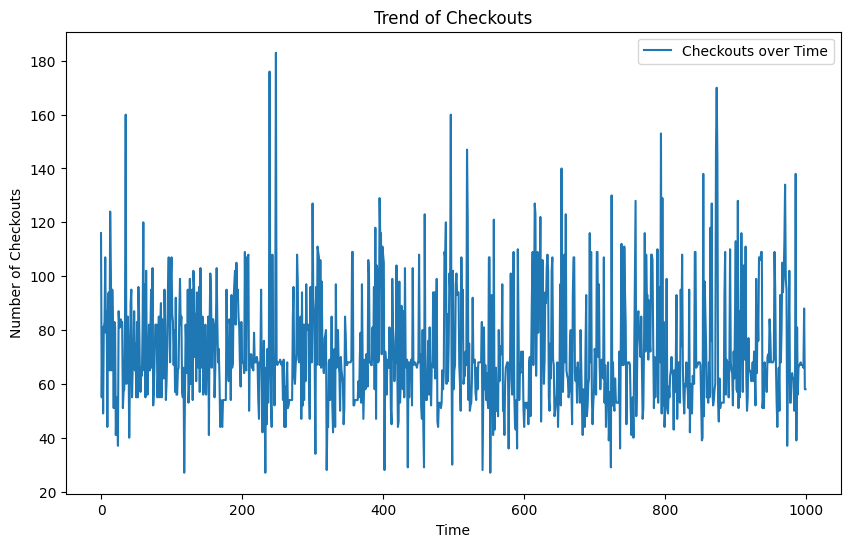

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Checkouts'], label='Checkouts en el tiempo')
plt.title('Tendencia de número de checkouts')
plt.xlabel('Tiempo')
plt.ylabel('Número de checkouts')
plt.legend()
plt.show()

#### Mapa de correlaciones

En este diagrama de correlación, podemos observar que las llegadas están fuertemente correlacionadas con los checkouts, seguido por el tiempo de servicios, de ciertaforma es lógico, tomando el cuenta que a un número mayor de llegadas, correspondería un mayor número de cajas abiertas, que al final lo que buscamos es deducir cuántas cajas necesitamos tener abiertas para poder atender toda la demanda de una tienda normal.

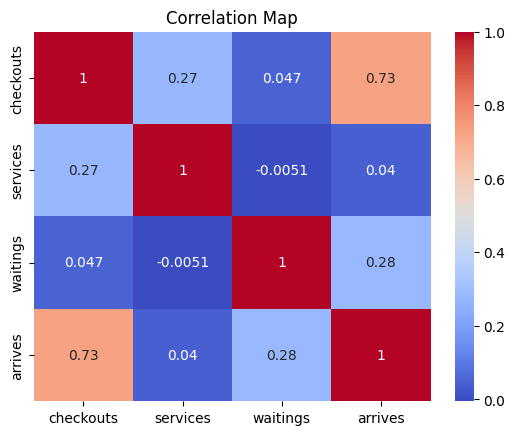

In [78]:
import seaborn as sns
correlation = data[['checkouts', 'services', 'waitings', 'arrives']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

#### Normalización de los datos

Para nuestro set de datos, es necesario aplicar una transformación, debido a que la mayoría de datos están expresados en tiempo (minutos) a excepción de los checkouts que son de distribución discreta de los datos

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['checkouts', 'services', 'waitings', 'arrives']])
data_scaled = pd.DataFrame(data_scaled, columns=['checkouts', 'services', 'waitings', 'arrives'])
data_scaled.head()


,checkouts,services,waitings,arrives
0,2.009790,0.994508,-0.069640,1.147767
1,-0.779489,-0.601359,-0.605314,-1.122167
2,0.409384,-0.701101,1.294724,-0.473096
3,-1.053845,-0.601359,-0.472540,-1.122167
4,0.409384,-0.135898,-0.164261,0.607479
